In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

https://www.kaggle.com/datasets/rishikeshkonapure/home-loan-approval

In [2]:
df = pd.read_csv('loan_sanction_train.csv')


In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Deal with null values

In [4]:
df.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [5]:
print('Gender', len(df[df['Gender'].isna()]))
print('Married', len(df[df['Married'].isna()]))
print('Dependents', len(df[df['Dependents'].isna()]))
print('Self_Employed', len(df[df['Self_Employed'].isna()]))
print('LoanAmount', len(df[df['LoanAmount'].isna()]))
print('Loan_Amount_Term', len(df[df['Loan_Amount_Term'].isna()]))
print('Credit_History', len(df[df['Credit_History'].isna()]))

print('total unique rows with missing values =', len(df[df.isnull().any(axis=1)]))

Gender 13
Married 3
Dependents 15
Self_Employed 32
LoanAmount 22
Loan_Amount_Term 14
Credit_History 50
total unique rows with missing values = 134


In [6]:
# df = df.dropna(subset=['Dependents', 'LoanAmount', 'Loan_Amount_Term'])

In [7]:
# print('Gender', len(df[df['Gender'].isna()]))
# print('Married', len(df[df['Married'].isna()]))
# print('Dependents', len(df[df['Dependents'].isna()]))
# print('Self_Employed', len(df[df['Self_Employed'].isna()]))
# print('LoanAmount', len(df[df['LoanAmount'].isna()]))
# print('Loan_Amount_Term', len(df[df['Loan_Amount_Term'].isna()]))
# print('Credit_History', len(df[df['Credit_History'].isna()]))

# print('total unique rows with missing values =', len(df[df.isnull().any(axis=1)]))

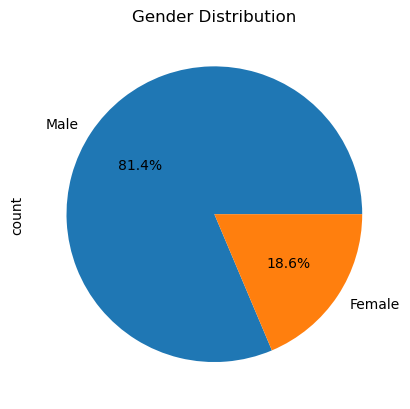

In [8]:
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

<Axes: >

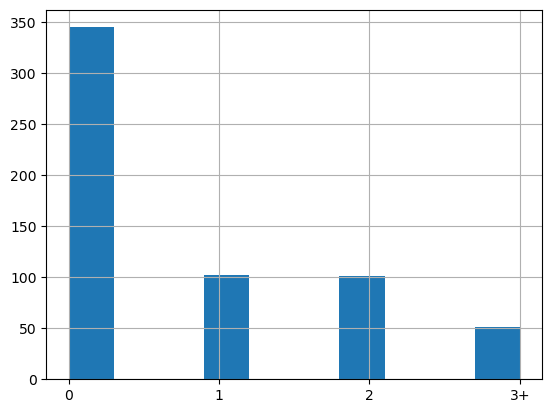

In [9]:
df['Dependents'].hist()

<Axes: >

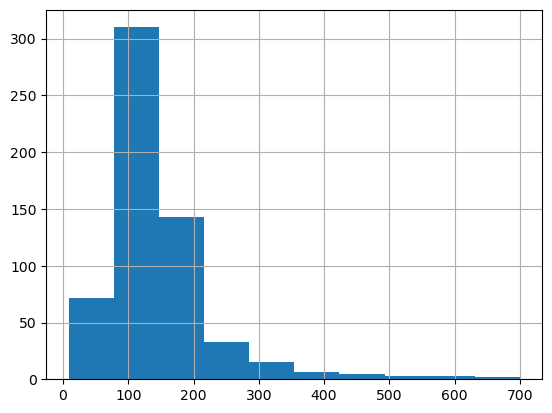

In [10]:
df['LoanAmount'].hist()

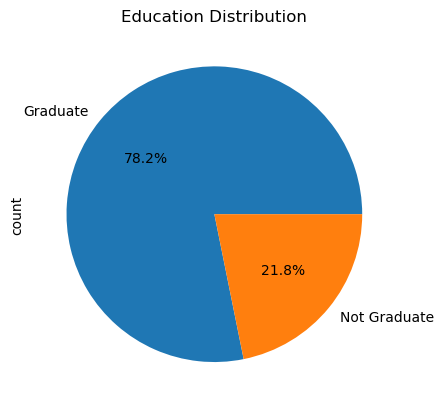

In [11]:
df['Education'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Education Distribution')
plt.show()

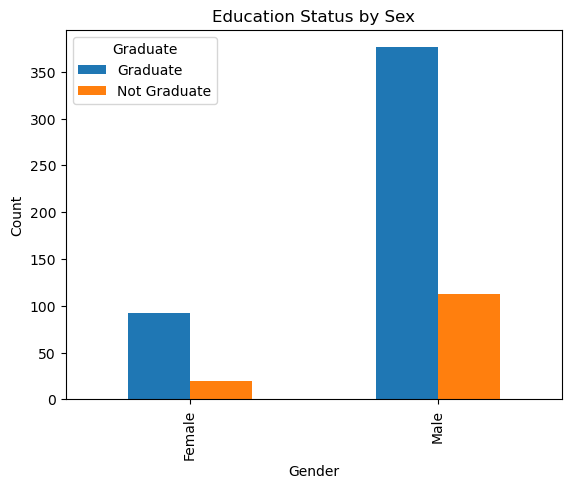

In [12]:
pd.crosstab(df['Gender'], df['Education']).plot(kind='bar')
plt.title('Education Status by Sex')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Graduate')
plt.show()

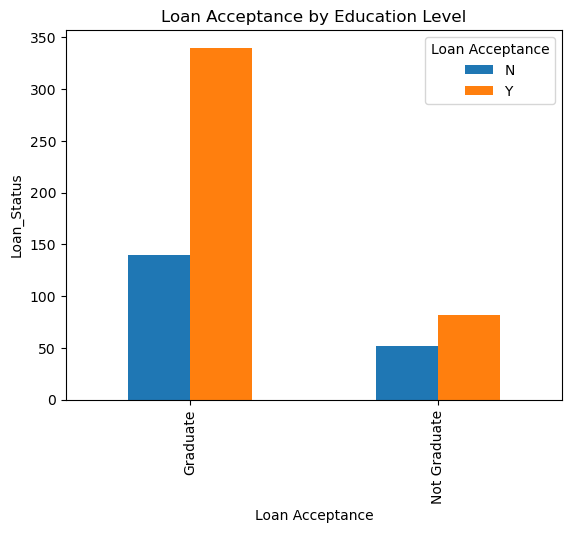

In [19]:
pd.crosstab(df['Education'], df['Loan_Status']).plot(kind='bar')
plt.title('Loan Acceptance by Education Level')
plt.xlabel('Loan Acceptance')
plt.ylabel('Loan_Status')
plt.legend(title='Loan Acceptance')
plt.show()

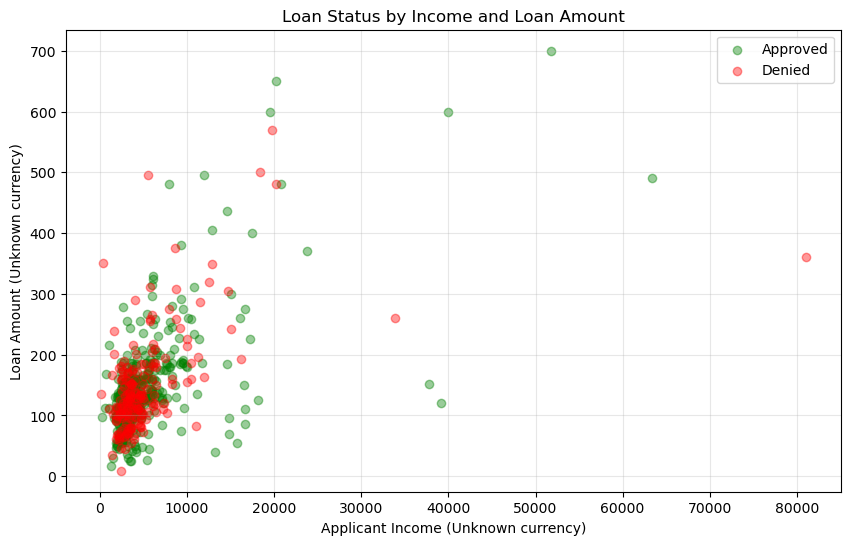

In [14]:
plt.figure(figsize=(10, 6))

# Plot approved loans
approved = df[df['Loan_Status'] == 'Y']
plt.scatter(approved['ApplicantIncome'], approved['LoanAmount'], 
           label='Approved', alpha=0.4, color='green')

# Plot denied loans
denied = df[df['Loan_Status'] == 'N']
plt.scatter(denied['ApplicantIncome'], denied['LoanAmount'], 
           label='Denied', alpha=0.4, color='red')

plt.title('Loan Status by Income and Loan Amount')
plt.xlabel('Applicant Income (Unknown currency)')
plt.ylabel('Loan Amount (Unknown currency)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


<Figure size 640x480 with 0 Axes>

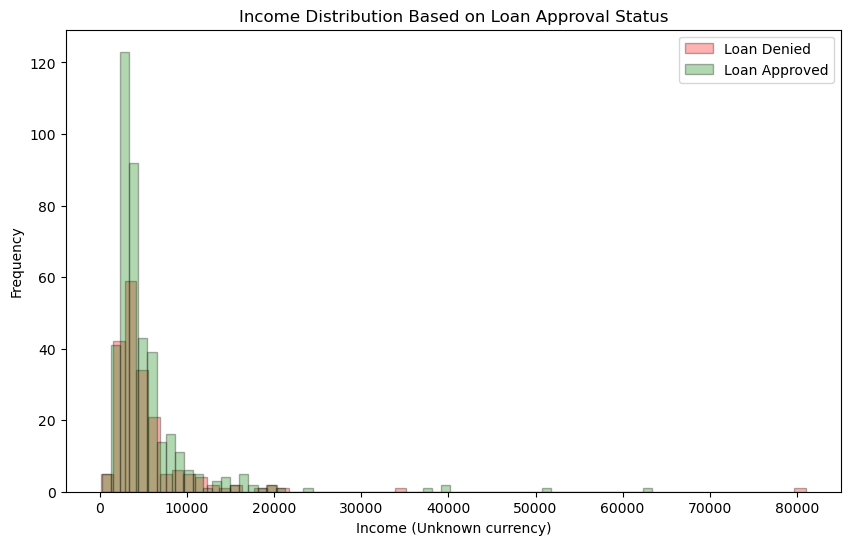

In [15]:
denied_loan_income = df[df['Loan_Status'] == 'N']['ApplicantIncome']
approved_loan_income = df[df['Loan_Status'] == 'Y']['ApplicantIncome']


plt.clf()
plt.figure(figsize=(10, 6))
plt.hist(denied_loan_income, bins=60, alpha=0.3, color='red', edgecolor='black')
plt.hist(approved_loan_income, bins=60, alpha=0.3, color='green', edgecolor='black')
plt.legend(['Loan Denied', 'Loan Approved'])
plt.title('Income Distribution Based on Loan Approval Status')
plt.xlabel('Income (Unknown currency)')
plt.ylabel('Frequency')
plt.show()

<Figure size 640x480 with 0 Axes>

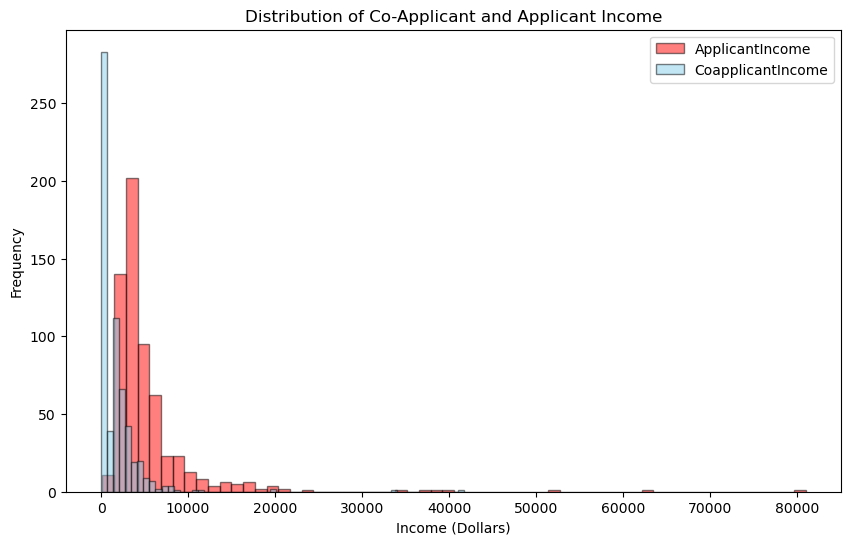

In [16]:
plt.clf()
plt.figure(figsize=(10, 6))
plt.hist(df['ApplicantIncome'], bins=60, alpha=0.5, color='red', edgecolor='black')
plt.hist(df['CoapplicantIncome'], bins=60, alpha=0.5, color='skyblue', edgecolor='black')
plt.legend(['ApplicantIncome', 'CoapplicantIncome'])
plt.title('Distribution of Co-Applicant and Applicant Income')
plt.xlabel('Income (Dollars)')
plt.ylabel('Frequency')
plt.show()

<Axes: >

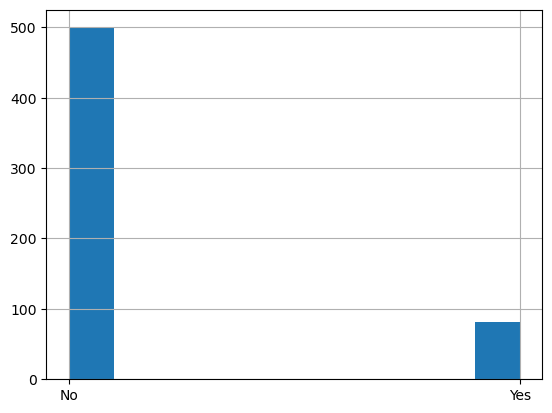

In [17]:
df['Self_Employed'].hist()

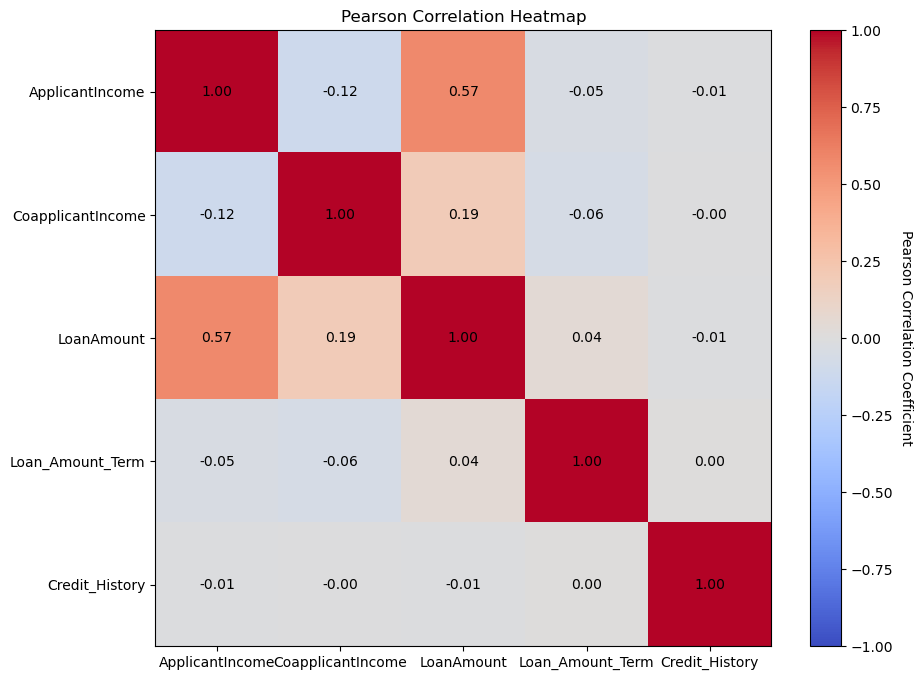

In [18]:
correlation_matrix = df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']].corr(method='pearson')

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)

# colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Pearson Correlation Coefficient", rotation=-90, va="bottom")

# tick labels
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns)
ax.set_yticklabels(correlation_matrix.columns)

# Loop over data dimensions and create text annotations
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = ax.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}",
                       ha="center", va="center", color="black")

ax.set_title("Pearson Correlation Heatmap")

plt.show()

# Splitting

In [109]:
from sklearn.model_selection import train_test_split 

y = df[['Loan_Status']]
X = df.loc[:, df.columns!='Loan_Status']

In [110]:
random_state = 42

# first split to separate out the training set
X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,random_state = random_state)
print('training set:',X_train.shape, y_train.shape) # 60% of points are in train
print(X_other.shape, y_other.shape) # 40% of points are in other

# second split to separate out the validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,random_state = random_state)
print('validation set:',X_val.shape, y_val.shape) # 20% of points are in validation
print('test set:',X_test.shape, y_test.shape) # 20% of points are in test

training set: (339, 12) (339, 1)
(227, 12) (227, 1)
validation set: (113, 12) (113, 1)
test set: (114, 12) (114, 1)


# Preprocessing

In [111]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [112]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']

ordinal_columns = ['Dependents', 'Loan_Amount_Term']
cats = [['0', '1', '2', '3+'], [ 12.,  36.,  60.,  84., 120., 180., 240., 300., 360., 480.]]

continuous_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

y_categorical_columns = ['Loan_Status']

In [120]:
# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = cats), ordinal_columns),
        ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), categorical_columns),
        ('std', StandardScaler(), continuous_columns)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

preprocessor.get_feature_names_out()

array(['ord__Dependents', 'ord__Loan_Amount_Term',
       'onehot__Gender_Female', 'onehot__Gender_Male',
       'onehot__Gender_nan', 'onehot__Married_No', 'onehot__Married_Yes',
       'onehot__Education_Graduate', 'onehot__Education_Not Graduate',
       'onehot__Self_Employed_No', 'onehot__Self_Employed_Yes',
       'onehot__Self_Employed_nan', 'onehot__Credit_History_0.0',
       'onehot__Credit_History_1.0', 'onehot__Credit_History_nan',
       'onehot__Property_Area_Rural', 'onehot__Property_Area_Semiurban',
       'onehot__Property_Area_Urban', 'std__ApplicantIncome',
       'std__CoapplicantIncome', 'std__LoanAmount'], dtype=object)

In [121]:
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), y_categorical_columns)
    ]
)

clf = Pipeline(steps=[('preprocessor', preprocessor)])

y_train_prep = clf.fit_transform(y_train)
y_val_prep = clf.transform(y_val)
y_test_prep = clf.transform(y_test)

preprocessor.get_feature_names_out()


array(['onehot__Loan_Status_N', 'onehot__Loan_Status_Y'], dtype=object)

In [119]:
print(X_train_prep[0])

[ 0.          8.          0.          1.          0.          0.
  1.          0.          1.          1.          0.          0.
  1.          0.          0.          0.          0.          1.
 -0.54147211  0.36257448 -0.6178874 ]
